In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ccode_iso = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_REV.xlsx", sheet_name="Sheet3")
df_intensity = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_intensity.xlsx")
df_footprint = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_crops_footprint_GFRAC.xlsx")

df_footprint_region = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_crops_footprint_region.xlsx")
df_intensity_region = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_intensity_region.xlsx")

df_footprint_subregion = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_crops_footprint_subregion.xlsx")
df_intensity_subregion = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_emission_intensity_subregion.xlsx")

In [7]:
results = {}

df_footprint = df_footprint.sort_values(by=['New Value', 'IMAGE Classification'], ascending=[True, True])

# Loop untuk melakukan filter pada setiap tahun
for country in df_footprint['Area'].unique():
    for year in df_footprint['Year'].unique():
        for category in df_footprint['IMAGE Classification'].unique():
            filtered_data = df_footprint[(df_footprint['Year'] == year) & (df_footprint['IMAGE Classification'] == category)]
            sorted_data = filtered_data.sort_values(by='New Value', ascending=False)
            top_5_data = sorted_data.head(5)
            if year not in results:
                results[year] = {}
            results[year][category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])

In [8]:
results = {}

df_intensity = df_intensity.sort_values(by=['New Value', 'IMAGE Classification'], ascending=[True, True])

# Loop untuk melakukan filter pada setiap tahun
for country in df_intensity['Area'].unique():
    for year in df_intensity['Year'].unique():
        for category in df_intensity['IMAGE Classification'].unique():
            filtered_data = df_intensity[(df_intensity['Year'] == year) & (df_intensity['IMAGE Classification'] == category)]
            sorted_data = filtered_data.sort_values(by='New Value', ascending=False)
            top_5_data = sorted_data.head(5)
            if year not in results:
                results[year] = {}
            results[year][category] = top_5_data

df_intensity_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])

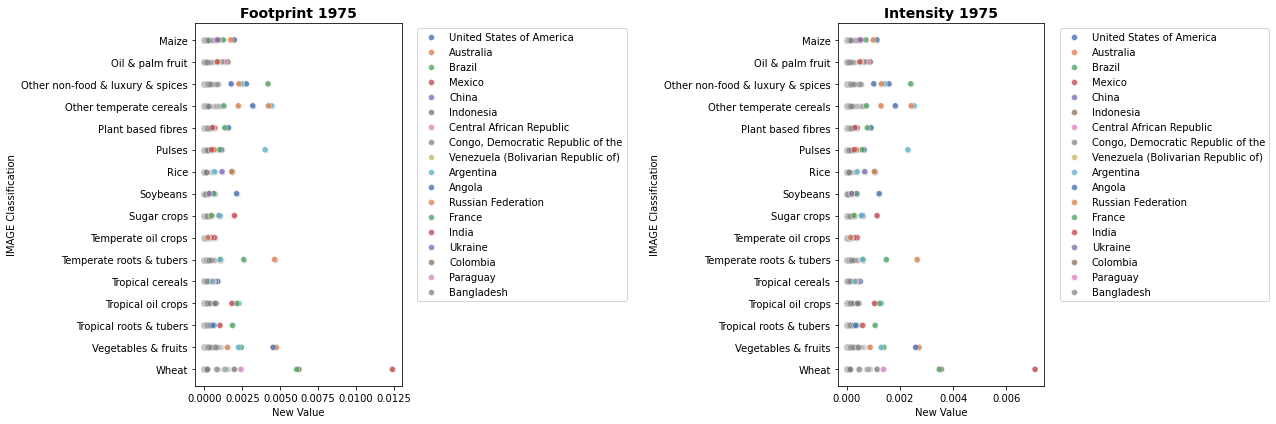

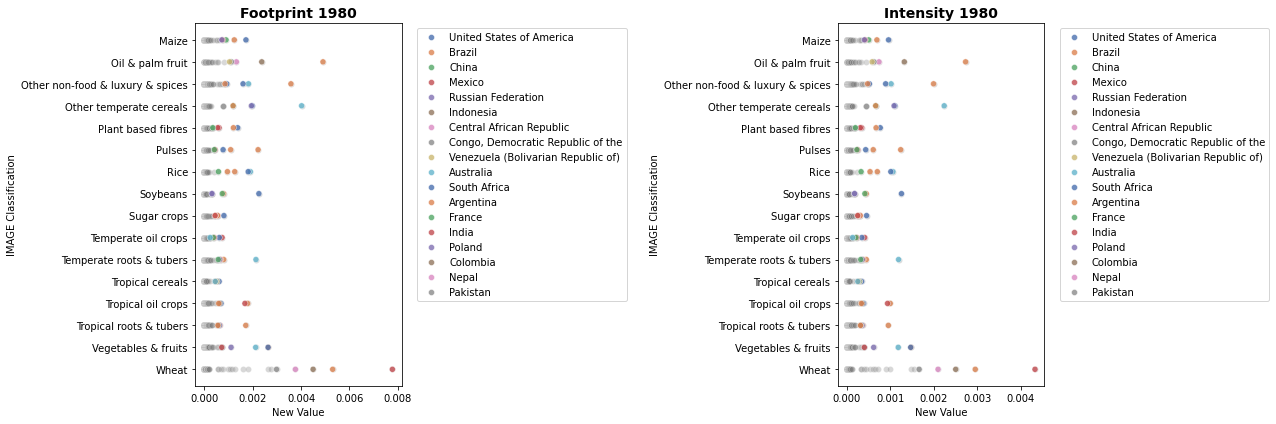

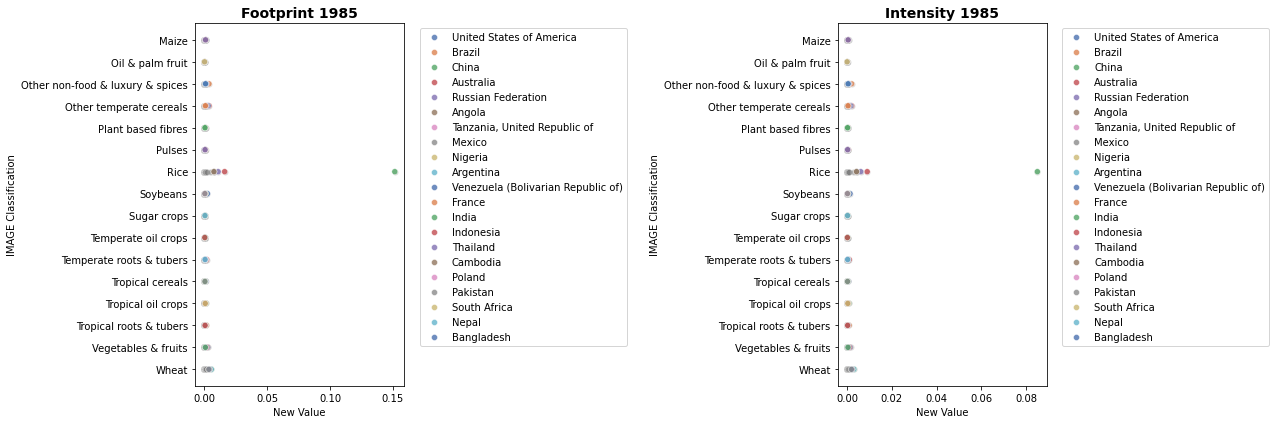

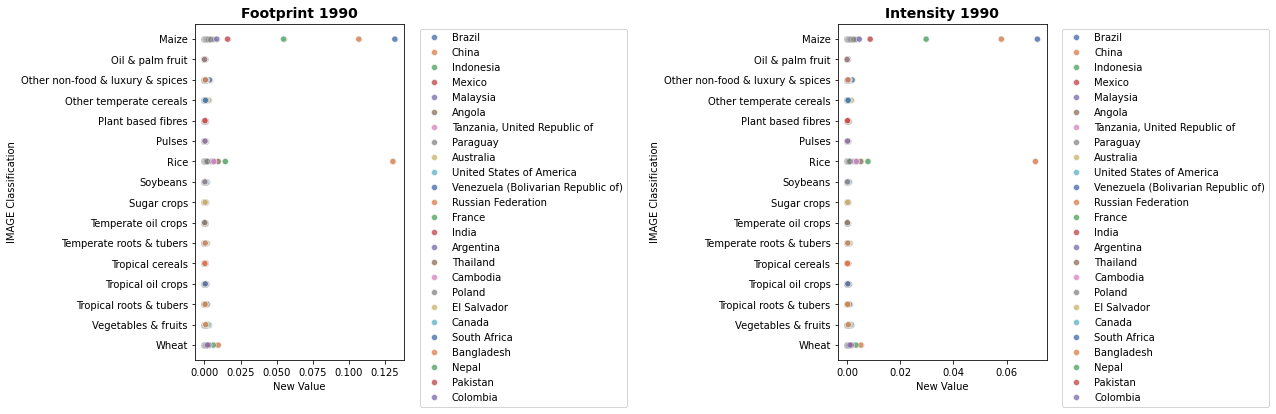

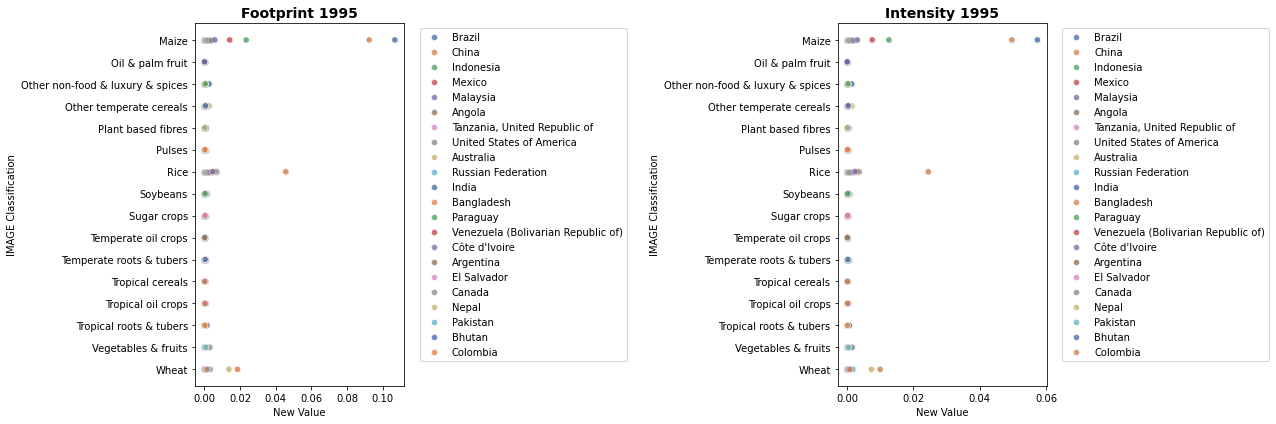

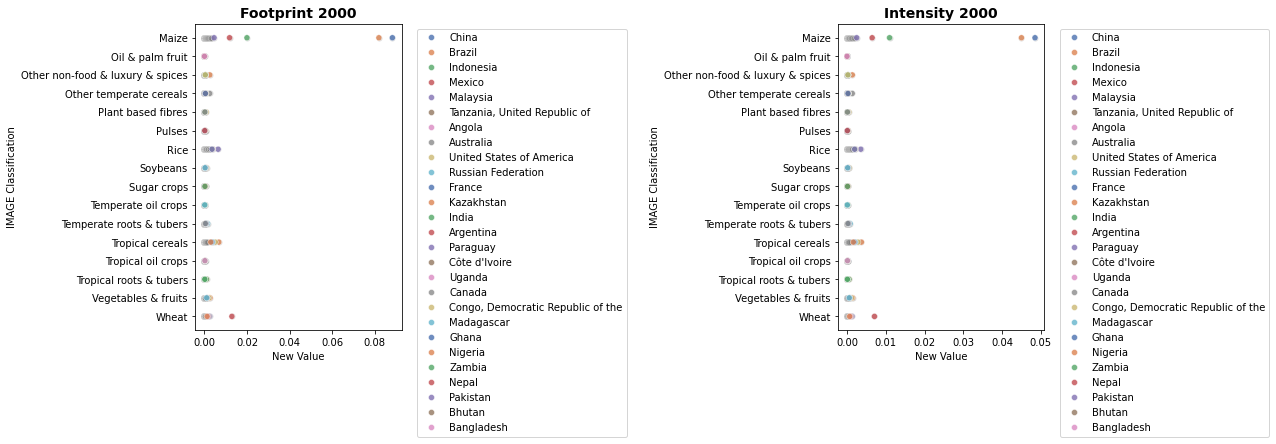

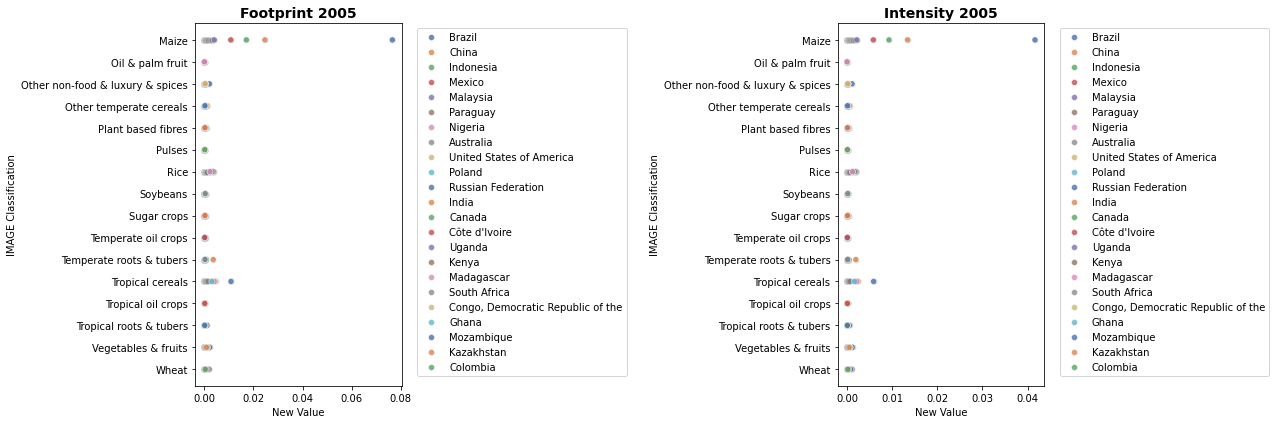

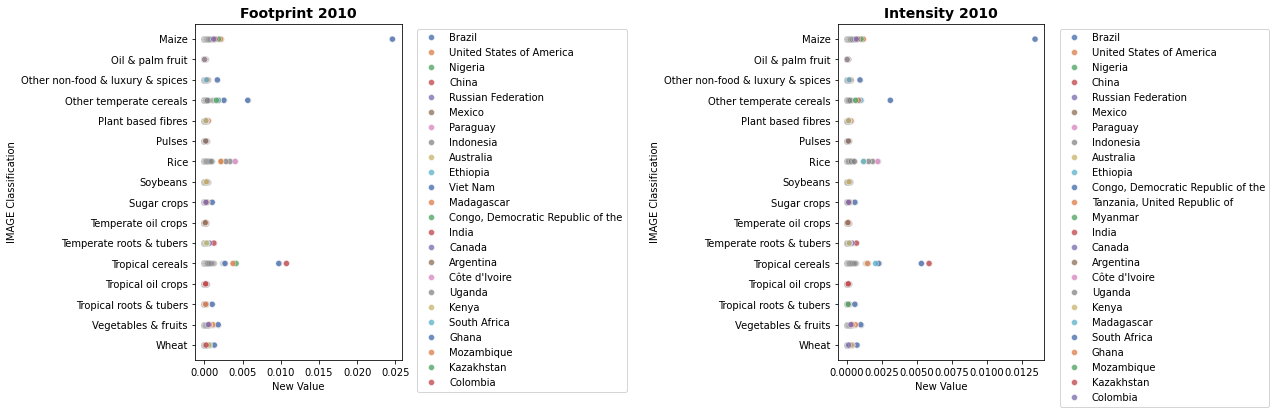

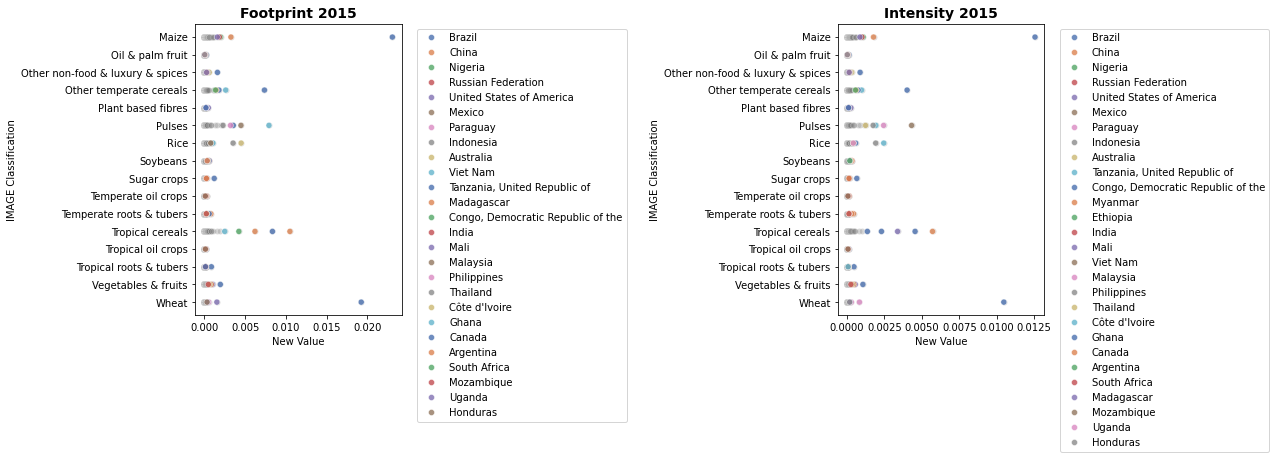

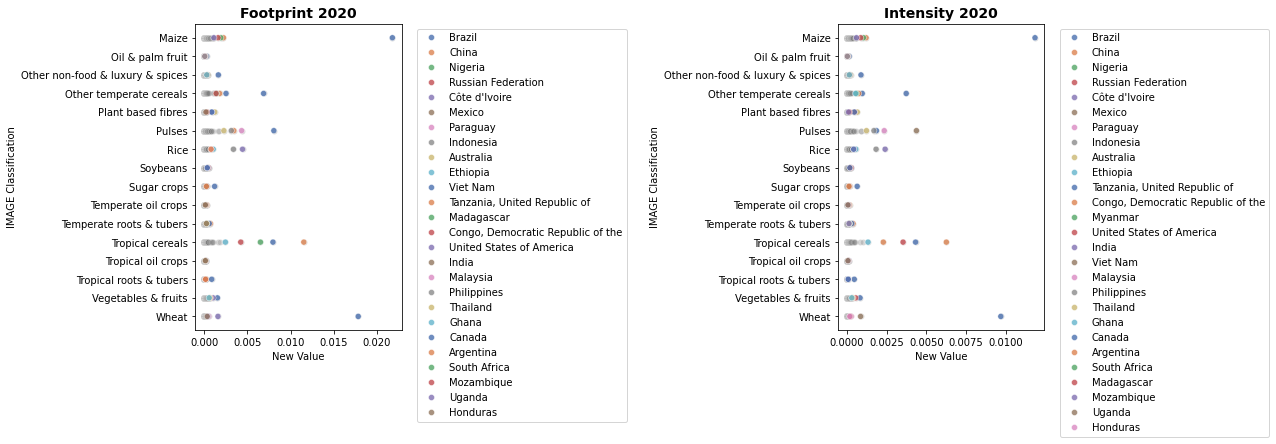

In [14]:
for year in range(1975, 2025, 5):
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6))

    axs[0].set_title(f"Footprint {year}", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", color='grey',
                sizes=(100, 300), alpha=.3, data=df_footprint[df_footprint['Year'] == year], ax=axs[0])
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='Area',
                sizes=(100, 300), alpha=.8, palette="deep",
                data=df_footprint_df[df_footprint_df['Year'] == year], ax=axs[0])
    axs[0].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    axs[1].set_title(f"Intensity {year}", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", color='grey',
                sizes=(100, 300), alpha=.3, data=df_intensity[df_intensity['Year'] == year], ax=axs[1])
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='Area',
                sizes=(100, 300), alpha=.8, palette="deep",
                data=df_intensity_df[df_intensity_df['Year'] == year], ax=axs[1])
    axs[1].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    plt.tight_layout()
    plt.show()

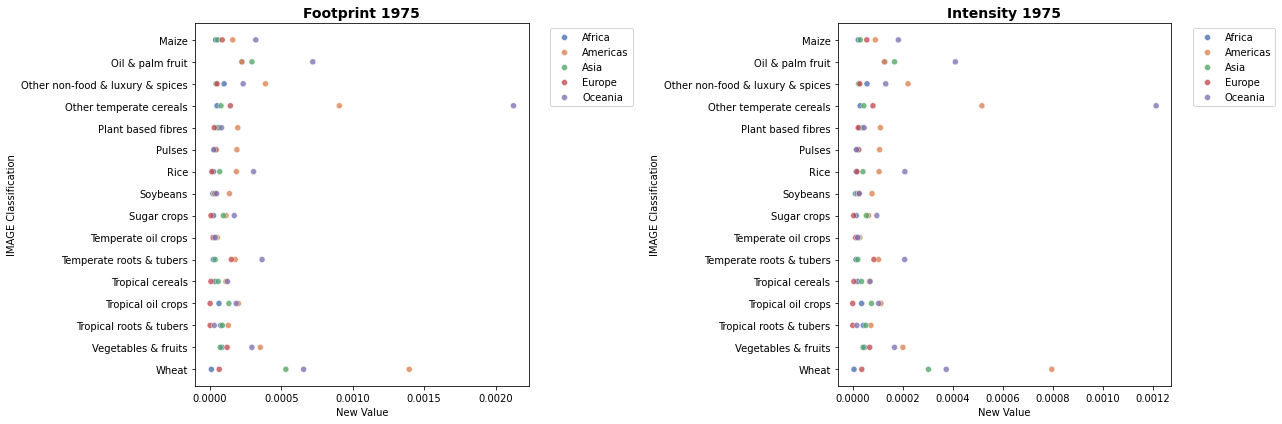

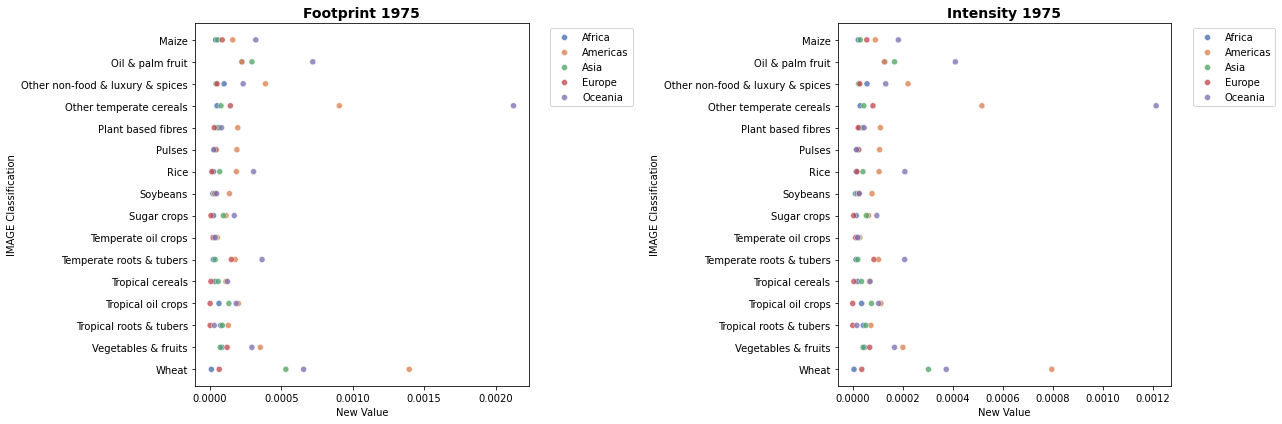

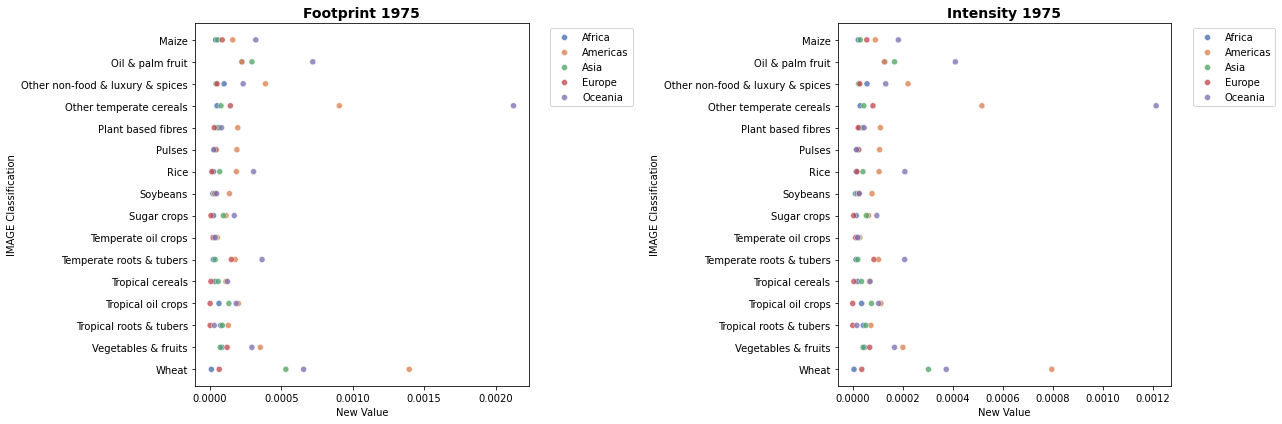

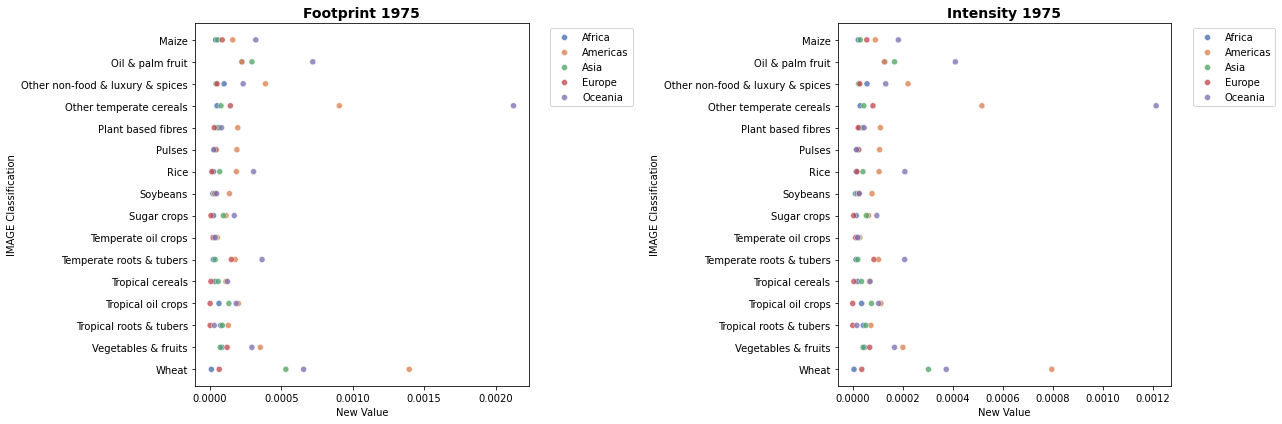

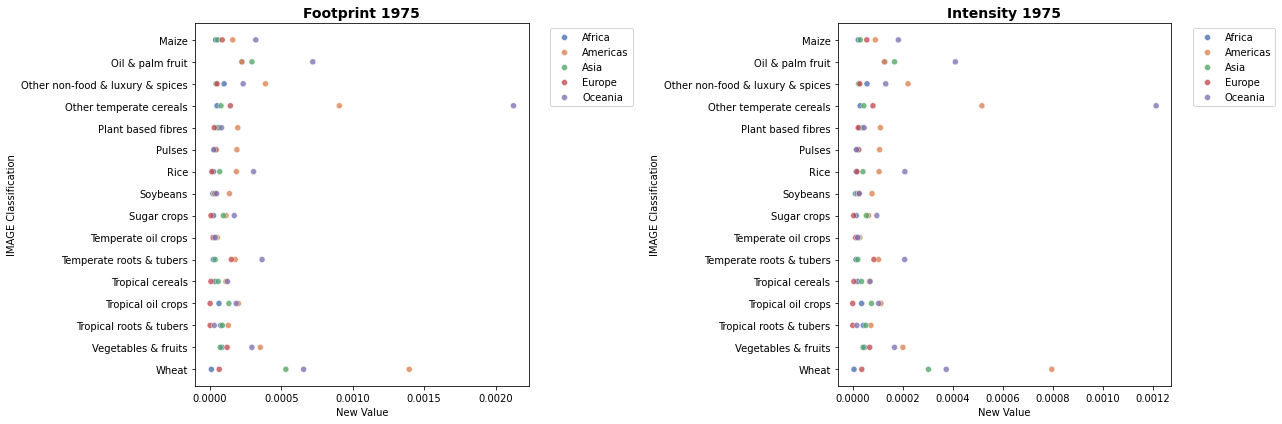

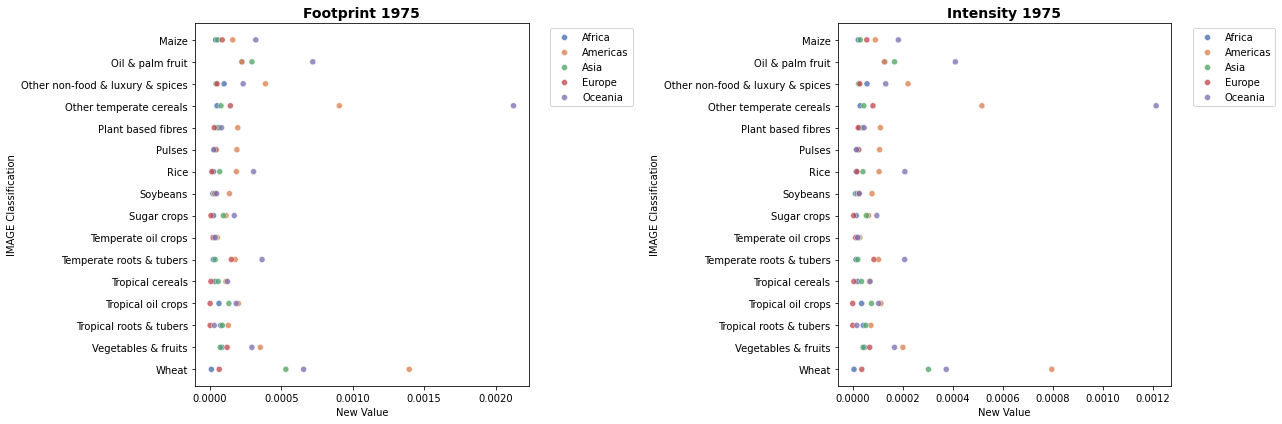

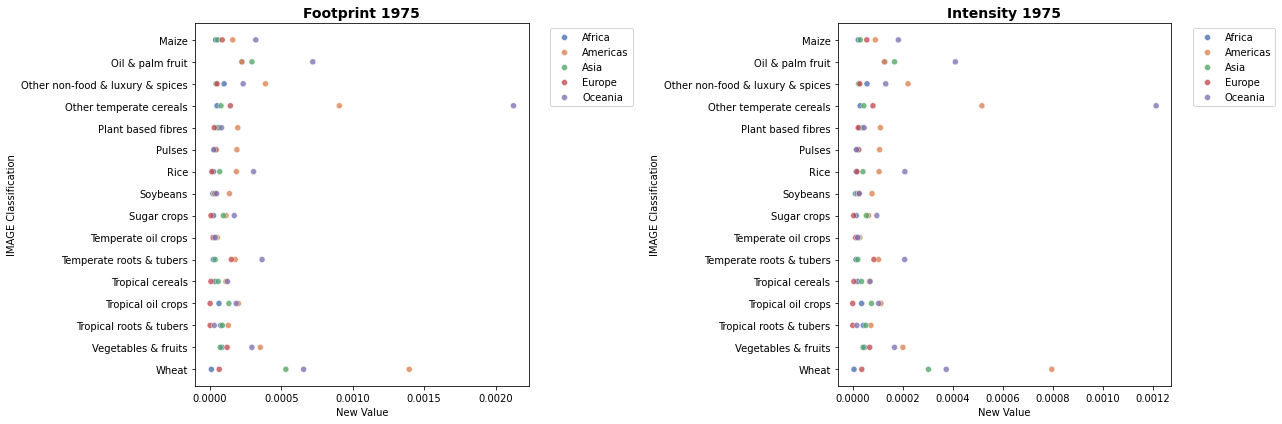

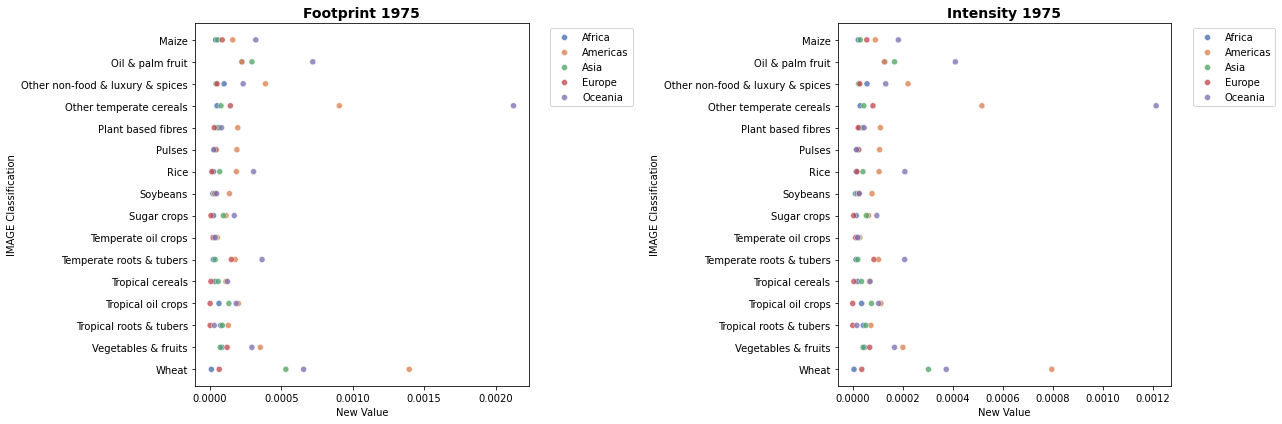

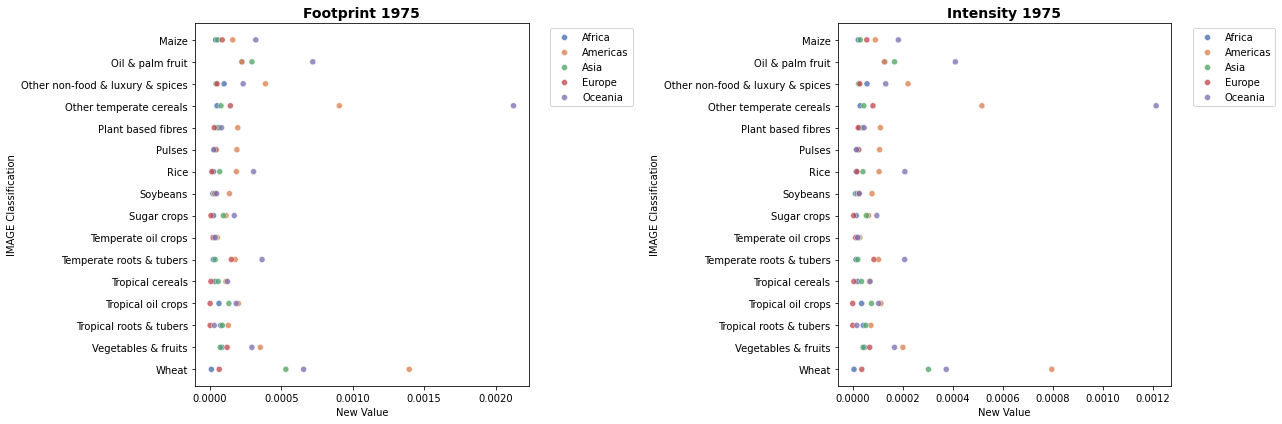

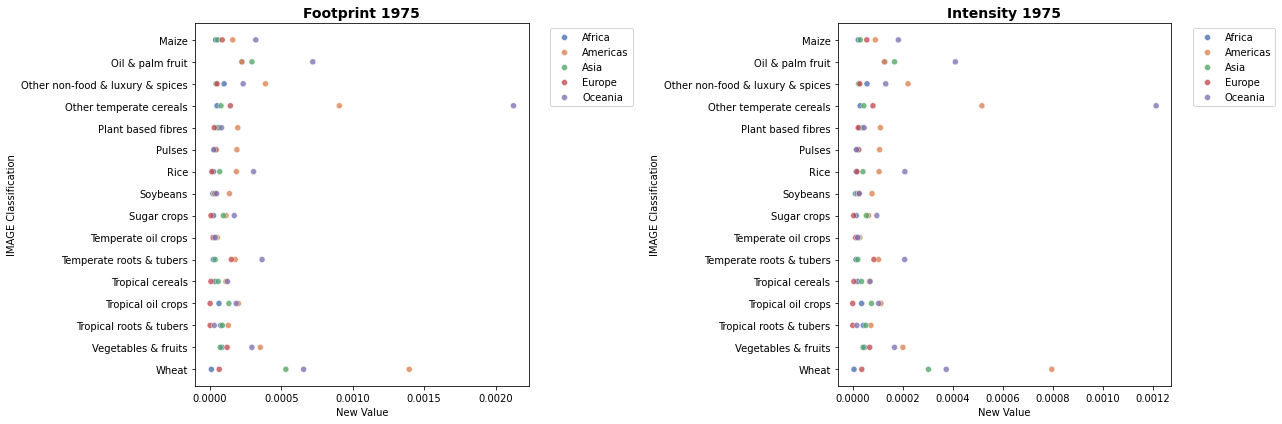

In [6]:
for year in range(1975, 2025, 5):
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6))

    axs[0].set_title(f"Footprint 1975", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='Region',
                sizes=(100, 400), alpha=.8, palette="deep",
                data=df_footprint_region[df_footprint_region['Year'] == 1975], ax=axs[0])
    axs[0].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    axs[1].set_title(f"Intensity 1975", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='Region',
                sizes=(100, 400), alpha=.8, palette="deep",
                data=df_intensity_region[df_intensity_region['Year'] == 1975], ax=axs[1])
    axs[1].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    plt.tight_layout()
    plt.show()

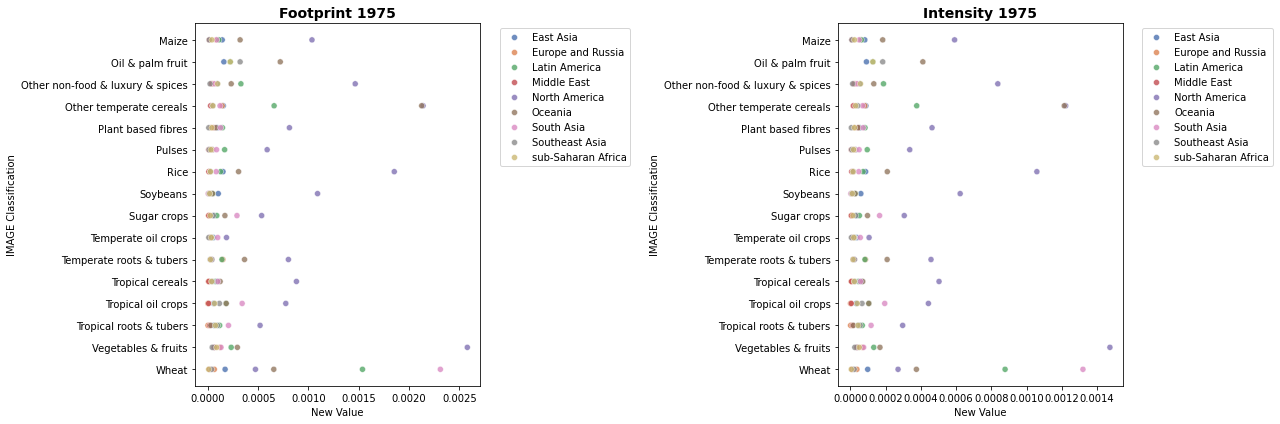

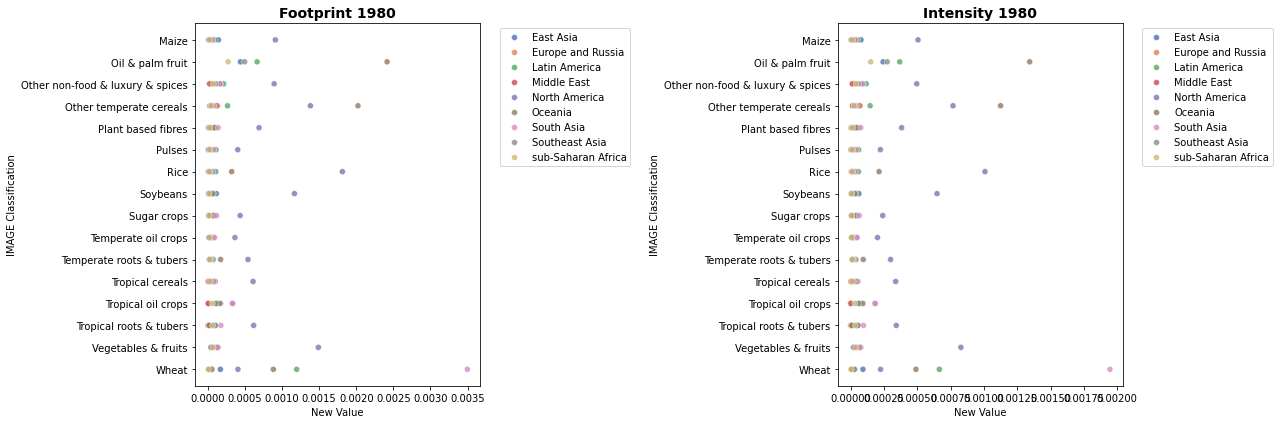

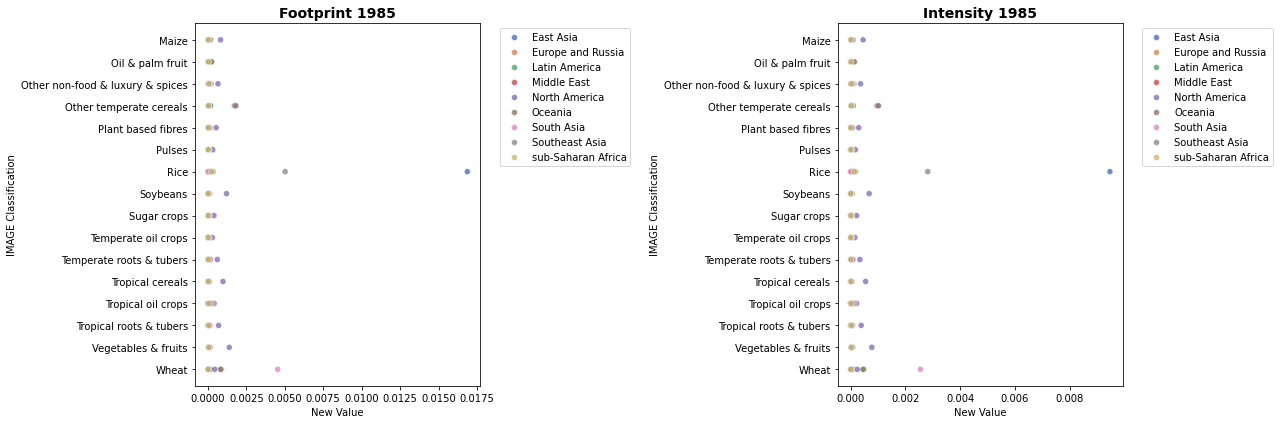

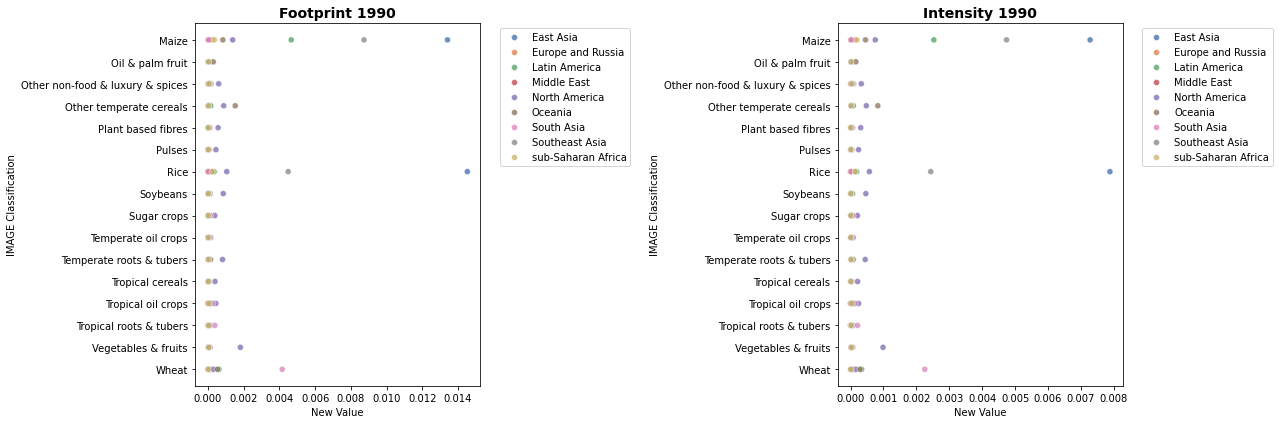

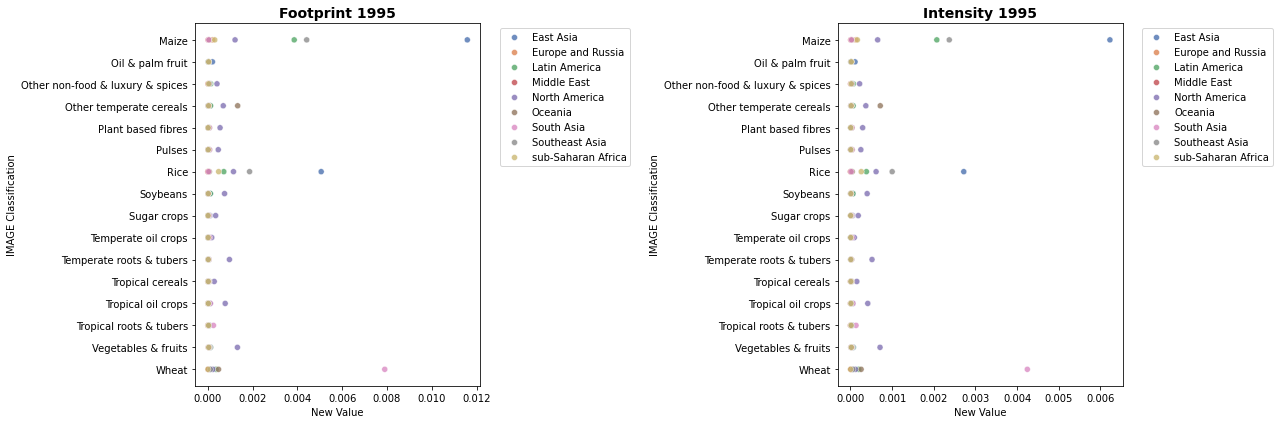

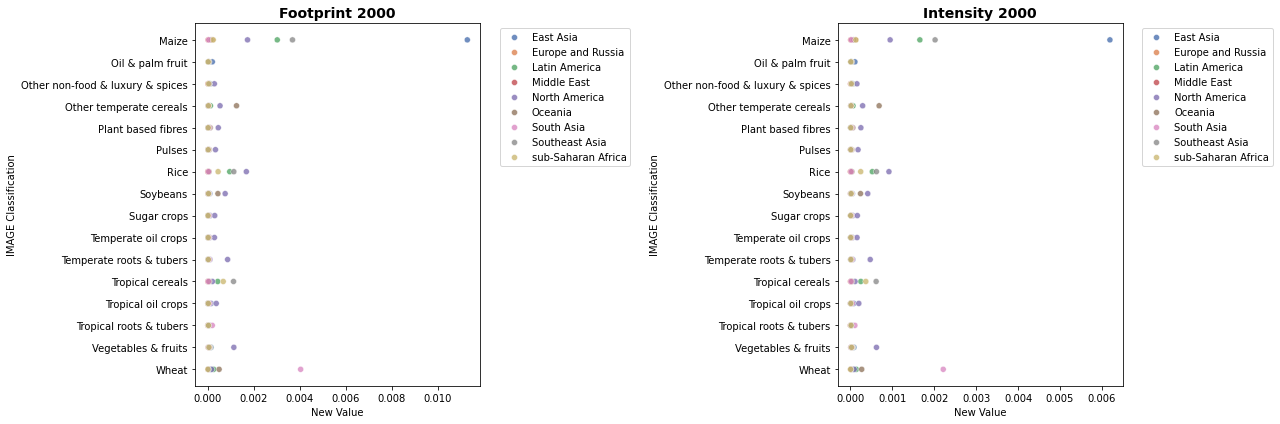

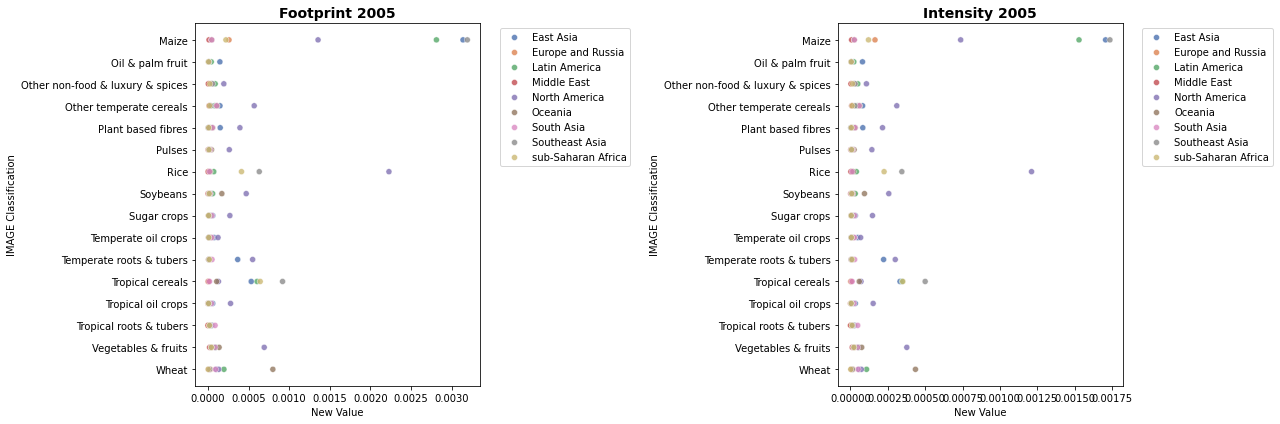

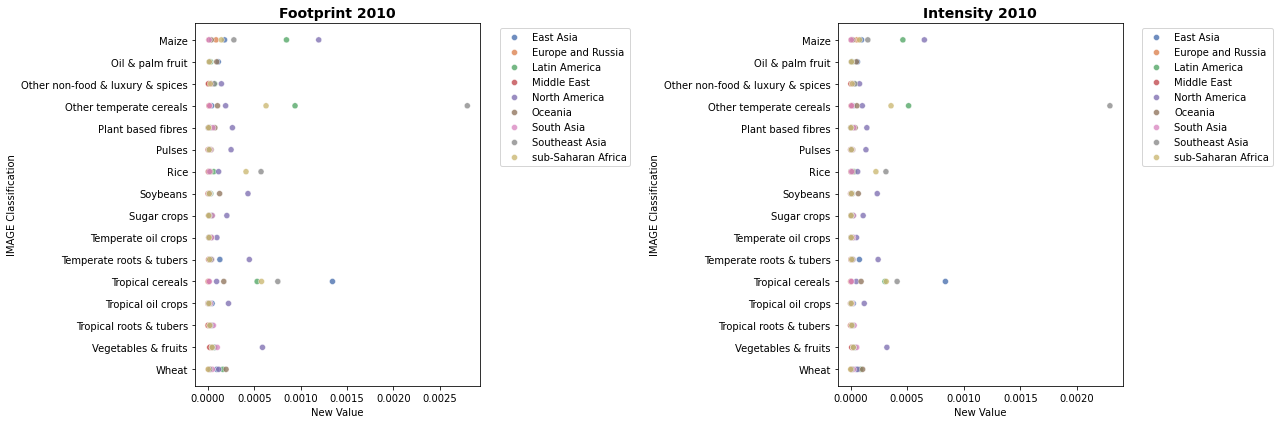

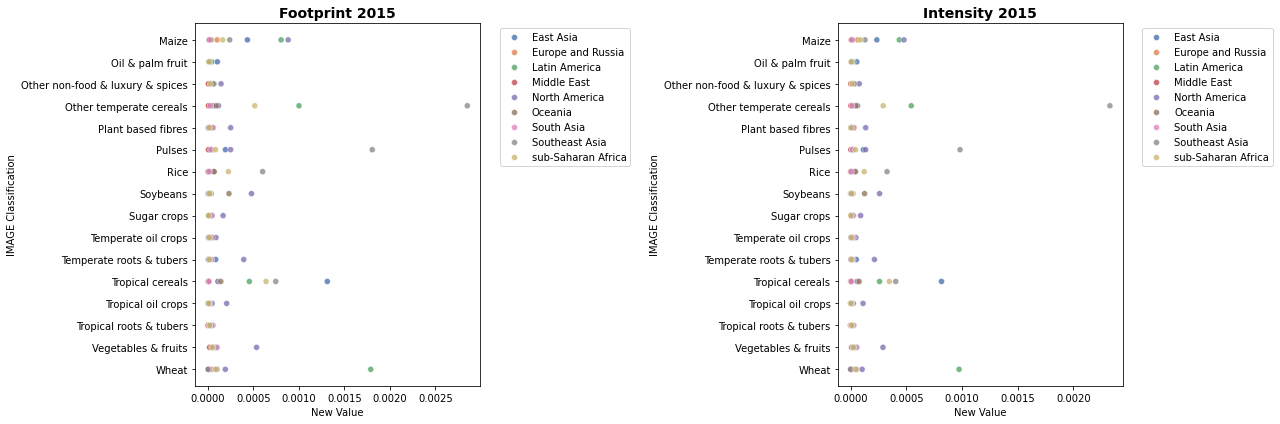

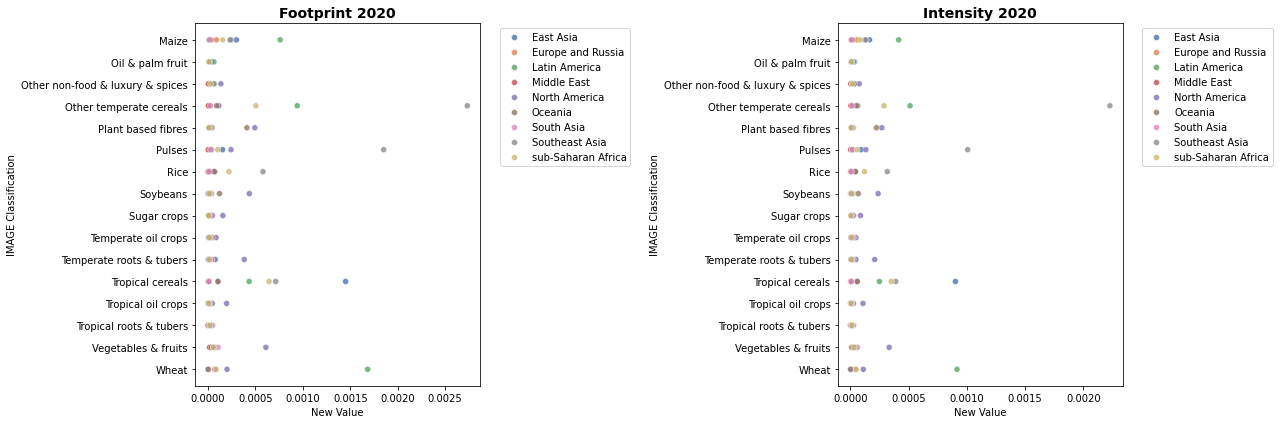

In [17]:

for year in range(1975, 2025, 5):
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6))

    axs[0].set_title(f"Footprint {year}", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='SubRegion',
                sizes=(100, 400), alpha=.8, palette="deep",
                data=df_footprint_subregion[df_footprint_subregion['Year'] == year], ax=axs[0])
    axs[0].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    axs[1].set_title(f"Intensity {year}", fontsize=14, fontweight="bold")
    sns.scatterplot(x="New Value", y="IMAGE Classification", hue='SubRegion',
                sizes=(100, 400), alpha=.8, palette="deep",
                data=df_intensity_subregion[df_intensity_subregion['Year'] == year], ax=axs[1])
    axs[1].legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left')

    plt.tight_layout()
    plt.show()